In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def norm(x, psi):
    dx  = x[1]-x[0]
    nrm = np.dot( psi, np.conj(psi) )*dx
    return nrm

def gaussian(x, x0, width, p):
    """
    Put a Gaussian wave function into the system. The `x0`,
    `width` and `p` variables are in physical units.
    """
    dx  = x[1]-x[0]
    pu  = np.exp( -(x-x0)**2/width**2 + 1j*x*p)
    nrm = norm(x, pu)
    print(nrm)
    pu /= np.sqrt(nrm)
    return pu

In [3]:
def evolve_forward(dt, V, psi):
    """
    Return `psi(x, t+dt)` given `psi(x,t) = psi`.
    """
    return psi + 0.5*1j*dt*( np.roll(psi,1) + np.roll(psi,-1) - 2*(1+V)*psi )

In [4]:
def evolve_centered(dt, V, psi, psim):
    """
    Return `psi(x, t+dt)` given `psi(x,t) = psi` and `psi(x, t-dt) = psim`.
    
    """
    return psim + 1j*dt*( np.roll(psi,1) + np.roll(psi,-1) - 2*(1+V)*psi )

In [5]:
N  = 800     # number of lattice points
Bl = -25.0   # left boundary in physical units
Br = 25.0    # right boundary in physical units
p  = 5       # momentum in physical units
V0 = 10
dt = 0.25

dx       = (Br-Bl)/(N-1)
x        = np.linspace(Bl, Br, N)
V        = np.zeros(len(x))
psi      = gaussian(x, -20, width=2, p=p)
psi_prev = evolve_forward(-dt, V, psi)

(2.5066276666337455+0j)


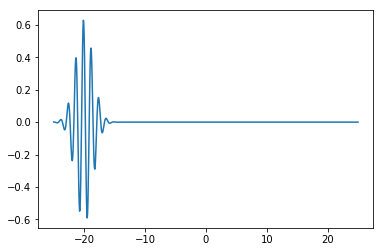

In [6]:
plt.plot(x, np.real(psi) )

In [7]:
#for i in range(10000):
#        psi, psi_prev = evolve_centered(dt, V, psi, psi_prev), psi
#        psisq = np.real(psi)*np.real(psi)+np.imag(psi)*np.imag(psi)
#        nrmsq=np.sum(psisq)*dx
#        if i%1000==0:
#            print(nrmsq)

In [8]:
def update_plot(n):
    global dt, V, psi, psi_prev
    for i in range(100):
        psi, psi_prev = evolve_centered(dt, V, psi, psi_prev), psi
    psisq = np.real(psi)*np.real(psi)+np.imag(psi)*np.imag(psi)
    line[0].set_data(x, np.real(psi))
    line[1].set_data(x, psisq)
    #line[0].set_data(x, np.real(psi))
    #line[1].set_data(x, np.imag(psi))
    #
    #nrmsq=np.sum(psisq)*dx
    #line[2].set_data(x, psisq)
    #line[4].set_text('$|\psi|^2 = {}$'.format(nrmsq))
    #line[5].set_text('$frame = {}$'.format(n))    
    return line


In [9]:
%%capture
fig, ax = plt.subplots(2,1,sharex=True);
ax[0].set_xlim(( Bl, Br))
ax[0].set_ylim((-0.6, 0.6))
ax[1].set_ylim((0, 0.5))
line=[0,0]
line[0], = ax[0].plot([], [])
line[1], = ax[1].plot([], [])

In [10]:
def init():
    global line
    line[0].set_data([], [])
    line[1].set_data([], [])
    #plt.text(-0.1,0.5, '$Re(\psi)$', fontsize=15, transform=axs[0].transAxes)
    #plt.text(-0.1,0.5, '$|\psi|^2$', fontsize=15, transform=axs[1].transAxes)
    return line

In [11]:
anim = animation.FuncAnimation(fig, update_plot, init_func=init,
                              frames=200, interval=80, repeat=False, blit=True )

In [ ]:
HTML(anim.to_jshtml())